In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
import datetime
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings("ignore")

In [3]:
design_path = 'base_cursos_alura_design.xlsx'
cursos_design = pd.read_excel(design_path).drop(columns={'Unnamed: 0'})
cursos_design.head()

,Assunto,Nome_Curso,Carga_Horaria,url,contagem_alunos,nota_curso
0,UI Design,Curso Adobe XD: design visual de um site mobile,10h,https://www.alura.com.br/curso-online-adobe-xd...,9549,9.3
1,UI Design,Curso Adobe XD: refinando o visual da interface,10h,https://www.alura.com.br/curso-online-adobe-xd...,2279,9.3
2,UI Design,Curso Adobe XD: trabalhando com microinterações,10h,https://www.alura.com.br/curso-online-xd-micro...,1431,9.4
3,UI Design,Curso Adobe XD: componentes da interface,10h,https://www.alura.com.br/curso-online-adobe-xd...,3251,9.3
4,UI Design,Curso Sketch: incrementando e melhorando a UI,08h,https://www.alura.com.br/curso-online-sketch-i...,252,9.2


In [4]:
cursos_design['Nome_Curso'] = cursos_design['Nome_Curso'].str.replace('Curso','').str.strip()
cursos_design.rename(columns={'Nome_Curso':'nome_curso'},inplace=True)
cursos_design.head()

,Assunto,nome_curso,Carga_Horaria,url,contagem_alunos,nota_curso
0,UI Design,Adobe XD: design visual de um site mobile,10h,https://www.alura.com.br/curso-online-adobe-xd...,9549,9.3
1,UI Design,Adobe XD: refinando o visual da interface,10h,https://www.alura.com.br/curso-online-adobe-xd...,2279,9.3
2,UI Design,Adobe XD: trabalhando com microinterações,10h,https://www.alura.com.br/curso-online-xd-micro...,1431,9.4
3,UI Design,Adobe XD: componentes da interface,10h,https://www.alura.com.br/curso-online-adobe-xd...,3251,9.3
4,UI Design,Sketch: incrementando e melhorando a UI,08h,https://www.alura.com.br/curso-online-sketch-i...,252,9.2


In [5]:
df = pd.read_csv('../atividades_geral.csv')
qtde_concluintes = df.groupby('nome_curso')['data_fim_curso'].count().reset_index()
qtde_concluintes.columns=['nome_curso','qtde_concluintes']
qtde_concluintes.head()

,nome_curso,qtde_concluintes
0,(I/O) com R: formatos diferentes de entrada e ...,83
1,.NET 5 e EF Core: relacionando entidades,692
2,.NET 5 e Identity: autenticando e autorizando ...,364
3,.NET 5 e Identity: implementando controle de u...,493
4,.NET 6 e Identity: implementando controle de u...,64


In [6]:
cursos_design_ = pd.merge(cursos_design,qtde_concluintes,how='left',left_on='nome_curso', right_on='nome_curso')
cursos_design_.head()

,Assunto,nome_curso,Carga_Horaria,url,contagem_alunos,nota_curso,qtde_concluintes
0,UI Design,Adobe XD: design visual de um site mobile,10h,https://www.alura.com.br/curso-online-adobe-xd...,9549,9.3,1275.0
1,UI Design,Adobe XD: refinando o visual da interface,10h,https://www.alura.com.br/curso-online-adobe-xd...,2279,9.3,353.0
2,UI Design,Adobe XD: trabalhando com microinterações,10h,https://www.alura.com.br/curso-online-xd-micro...,1431,9.4,247.0
3,UI Design,Adobe XD: componentes da interface,10h,https://www.alura.com.br/curso-online-adobe-xd...,3251,9.3,495.0
4,UI Design,Sketch: incrementando e melhorando a UI,08h,https://www.alura.com.br/curso-online-sketch-i...,252,9.2,8.0


In [7]:
cursos_design_['taxa_conclusao'] = round((cursos_design_['qtde_concluintes']/cursos_design_['contagem_alunos'])*100,1)

In [8]:
cursos_design_['Carga_Horaria'] = cursos_design_['Carga_Horaria'].str.replace('h','').astype(int)

## Analisando os cursos

#### Análise por frequência absoluta

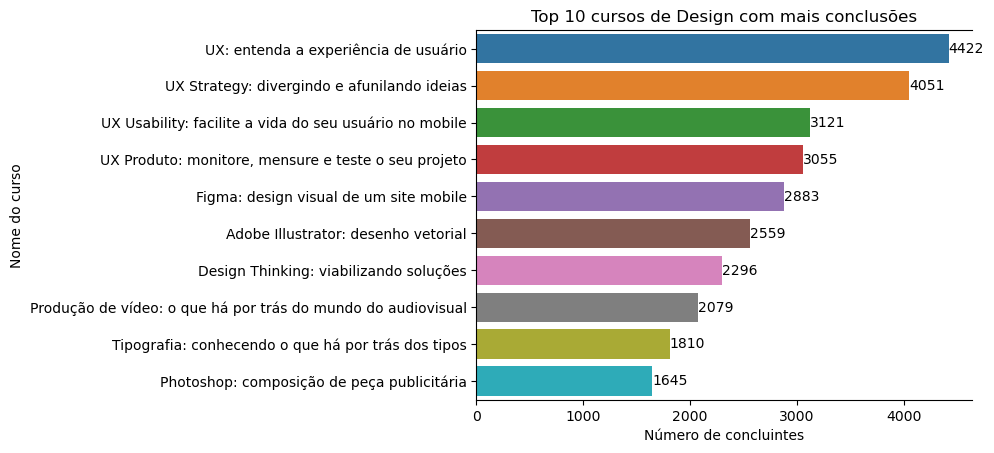

In [10]:
ax = sns.barplot(cursos_design_,
y='nome_curso',x='qtde_concluintes',
order=cursos_design_.sort_values('qtde_concluintes',ascending=False)['nome_curso'].values[:10])
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x:.0f}')
ax.spines['right'].set_visible(False)
ax.set_title('Top 10 cursos de Design com mais conclusões')
plt.ylabel('Nome do curso')
plt.xlabel('Número de concluintes')
plt.show()

#### Análise percentual

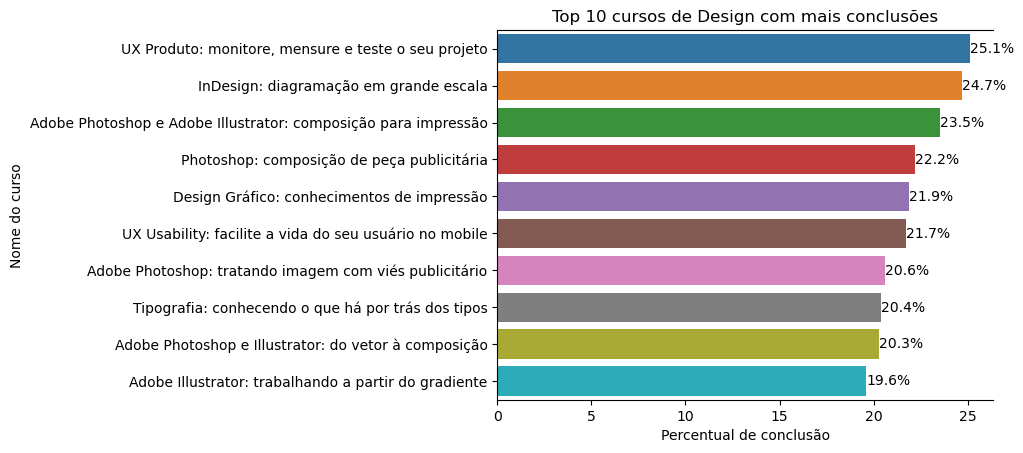

In [12]:
ax = sns.barplot(cursos_design_,
y='nome_curso',x='taxa_conclusao',
order=cursos_design_.sort_values('taxa_conclusao',ascending=False)['nome_curso'].values[:10])
ax.bar_label(ax.containers[0],fmt=lambda x: f'{x}%')
ax.spines['right'].set_visible(False)
ax.set_title('Top 10 cursos de Design com mais conclusões')
plt.ylabel('Nome do curso')
plt.xlabel('Percentual de conclusão')
plt.show()

Insight ✍️

Entre os mais concluídos, tem-se uma grande presença de cursos relacionados a Adobe/Photoshop

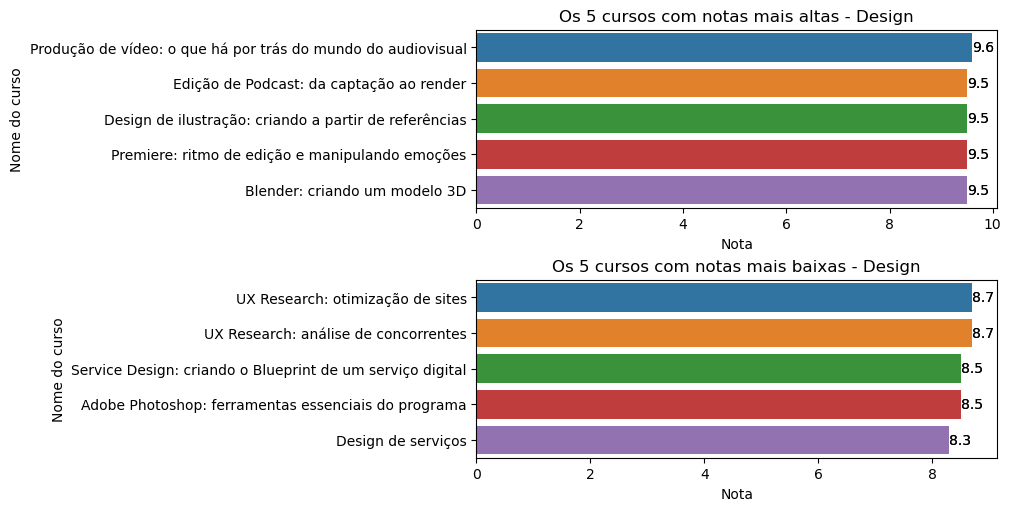

In [14]:
notas = cursos_design_.sort_values('nota_curso',ascending=False)
fig, axs = plt.subplots(2,1,constrained_layout=True,figsize=(10,5))

sns.barplot(notas.head(),
y='nome_curso',x='nota_curso',ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Os 5 cursos com notas mais altas - Design')
axs[0].bar_label(axs[0].containers[0])
axs[0].set_ylabel('Nome do curso')
axs[0].set_xlabel('Nota')


sns.barplot(notas.tail(),
y='nome_curso',x='nota_curso',ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('Os 5 cursos com notas mais baixas - Design')
axs[1].bar_label(axs[1].containers[0])
axs[1].set_ylabel('Nome do curso')
axs[1].set_xlabel('Nota')

fig.show()

In [17]:
cursos_design_['taxa_conclusao'].describe()

count    285.000000
mean       8.887368
std        5.209976
min        0.300000
25%        4.900000
50%        8.000000
75%       12.300000
max       25.100000
Name: taxa_conclusao, dtype: float64

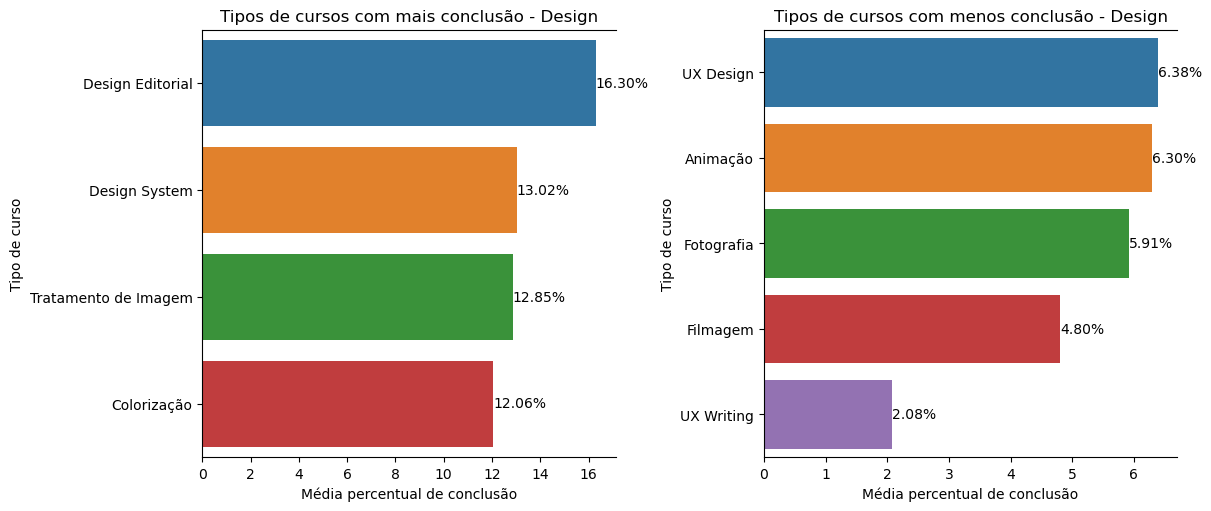

In [19]:
fig, axs = plt.subplots(1,2,constrained_layout=True,figsize=(12,5))

sns.barplot(cursos_design_.groupby('Assunto',as_index=False)['taxa_conclusao'].mean().sort_values('taxa_conclusao',ascending=False).head(4),
y='Assunto',x='taxa_conclusao',ax=axs[0])
axs[0].bar_label(axs[0].containers[0],fmt=lambda x: f'{x:.2f}%')
axs[0].set_title('Tipos de cursos com mais conclusão - Design')
axs[0].set_ylabel('Tipo de curso')
axs[0].set_xlabel('Média percentual de conclusão')


sns.barplot(cursos_design_.groupby('Assunto',as_index=False)['taxa_conclusao'].mean().sort_values('taxa_conclusao',ascending=False).tail(),
y='Assunto',x='taxa_conclusao',ax=axs[1])
axs[1].bar_label(axs[1].containers[0],fmt=lambda x: f'{x:.2f}%')

axs[0].spines['right'].set_visible(False)
axs[1].spines['right'].set_visible(False)

axs[1].set_title('Tipos de cursos com menos conclusão - Design')
axs[1].set_ylabel('Tipo de curso')
axs[1].set_xlabel('Média percentual de conclusão')

plt.show()

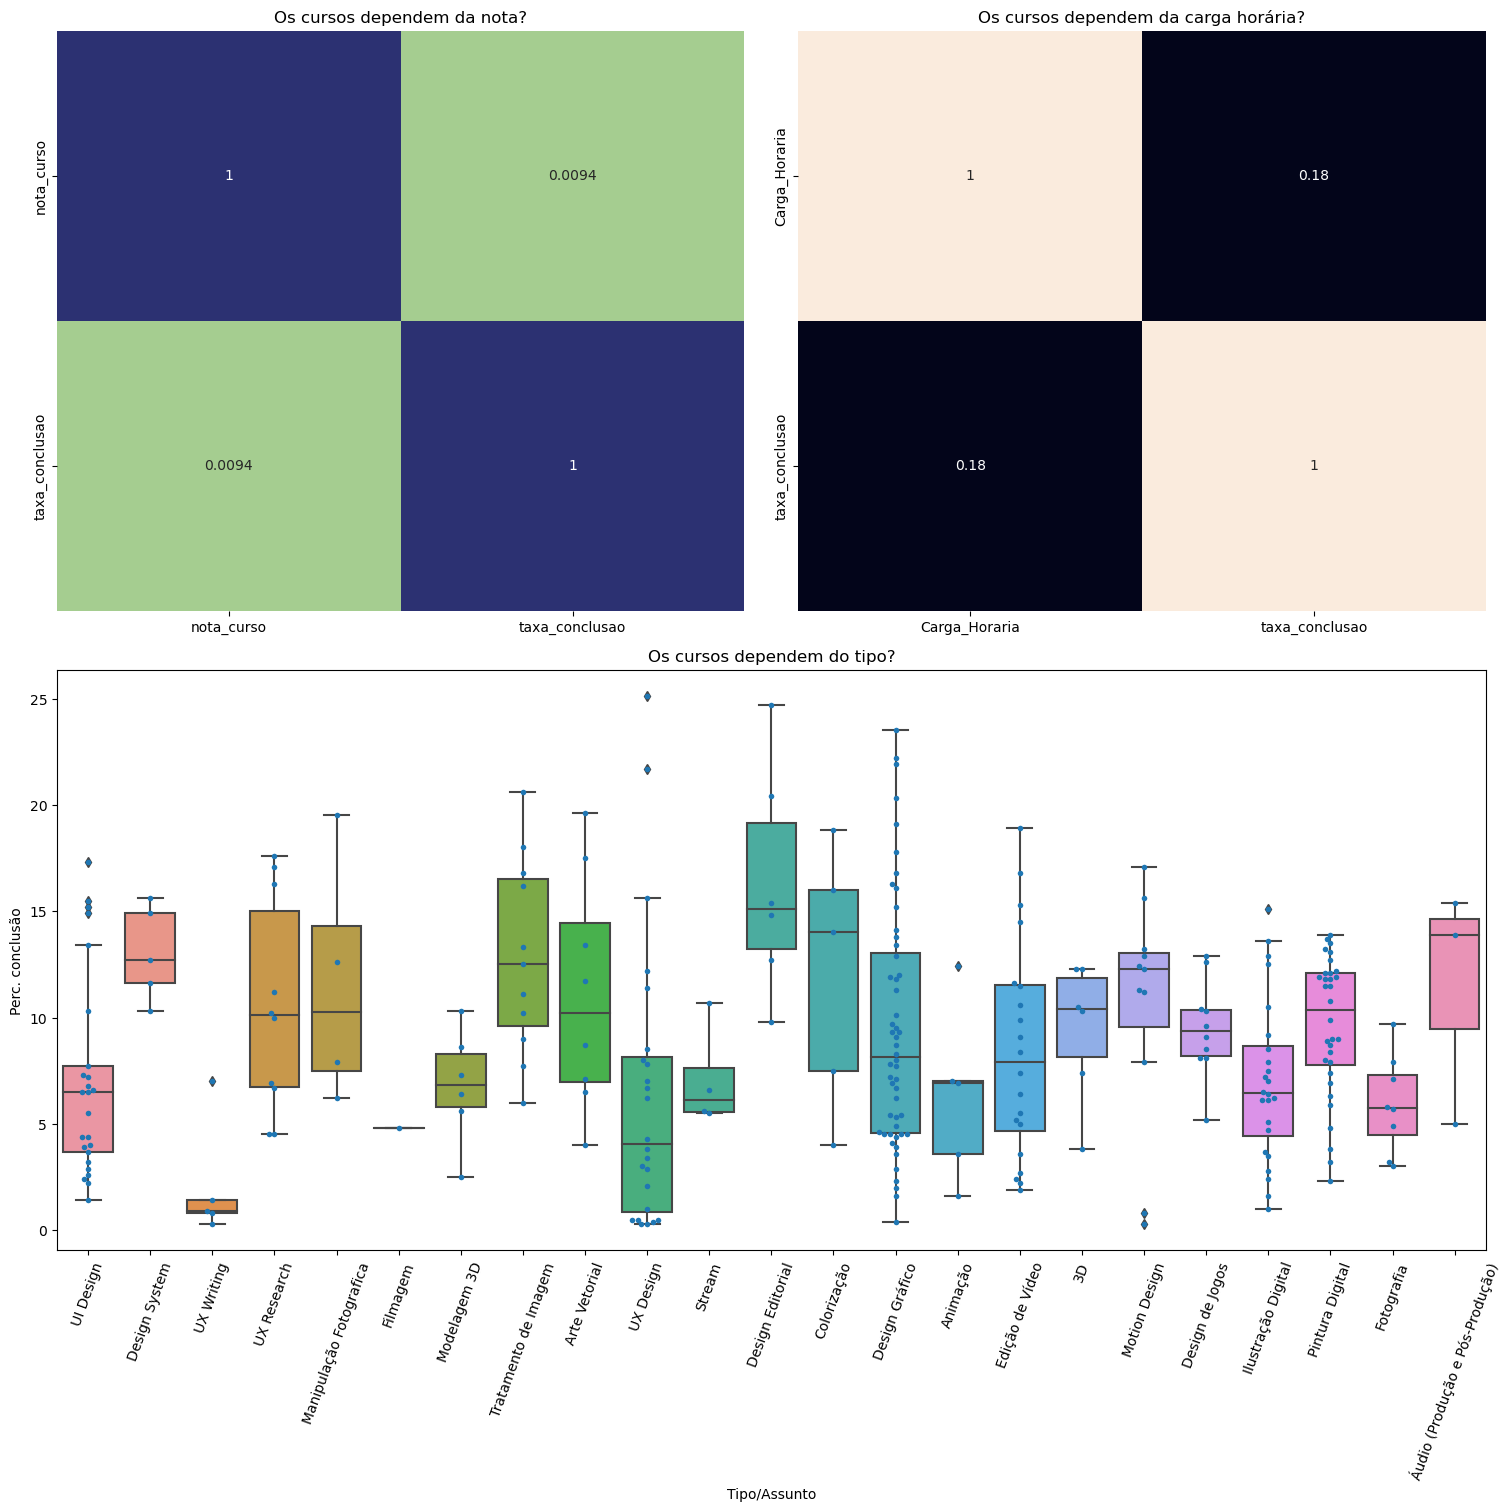

In [47]:
fig = plt.figure(constrained_layout=True, figsize=(15, 15))

gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])


sns.heatmap(cursos_design_[['nota_curso','taxa_conclusao']].corr(method='pearson'),annot=True,
cbar=False,ax=ax1, cmap="crest")
ax1.set_title('Os cursos dependem da nota?',size=12)


sns.heatmap(cursos_design_[['Carga_Horaria','taxa_conclusao']].corr(method='pearson'),annot=True,
cbar=False,ax=ax2)
ax2.set_title('Os cursos dependem da carga horária?',size=12)


#sns.violinplot(cursos_design_[cursos_design_.taxa_conclusao<=100],x='Assunto',y='taxa_conclusao',inner=None,ax=ax3)
sns.boxplot(cursos_design_[cursos_design_.taxa_conclusao<=100],x='Assunto',y='taxa_conclusao',ax=ax3)
#sns.violinplot(cursos_design_[cursos_design_.taxa_conclusao<=100],y='taxa_conclusao', x='Assunto',inner=None)
sns.swarmplot(cursos_design_, y="taxa_conclusao", x="Assunto", size=4,ax=ax3)
ax3.set_title('Os cursos dependem do tipo?',size=12)
ax3.set_xlabel('Tipo/Assunto')
ax3.set_ylabel('Perc. conclusão')
for tick in ax3.get_xticklabels():
    tick.set_rotation(70)


fig.show()

Insight ✍️

- Os cursos não dependem da nota, nem da carga horária
- De maneira geral os cursos não dependem do tipo, mas podemos dizer que os cursos de Design System e Editorial apresentam maiores probabilidades de conclusão, enquanto cursos como UI Design, UX writing e UX Design têm baixa probabilidade de conclusão